## PROC IML; Integrated Matrix Language

## iter 1: definiciones básicas

In [5]:
PROC IML;
    a = {2 3 4};
    print a;
    quit;

In [17]:
PROC IML;
    a = {2, 3, 4};
    b = a * 2;
    c = a + b;
    d = sum(c);
    pow = a##2;
    print a b c pow;
    print d;
    quit;

iter 2: more matrix operations
==

In [20]:
*character matrix;

Proc IML;
    letters = {'a','b','c'};
    print letters;
quit;

letters
a
b
c


In [21]:
*range vector;

proc iml;
    b = {1 2 4, 5 6 7};
    a = 1: 10;
    print a b;
    quit;

In [30]:
*creating a black matrix;
proc iml;
    a = j(2,3,10);
    a[1,2] = 10;
    b = a[+,];
    c = a[##,]; *weird notation for sum of square for every matrix column;
    print a b c;
    quit;

In [36]:
*loops ;
proc iml;
    a = 3;
    do while (a<10);
        print a;
        a = a + 1;
    end;
quit;

a
3
a
4
a
5
a
6
a
7
a


## proc iml: dataframes, matrices y modulos

In [37]:
data abc;
input a b;
cards;
1 4
2 6 
3 9
;
run;

In [41]:
proc iml;
    use abc;
    read all;
    read all into c;
    print a b c;
quit;

a,b,c,
1,4,1,4
2,6,2,6
3,9,3,9


a dataset live in the temporal worker library, matrix lives in the ram, have not got a fisical location.

In [48]:
*convert matrix to datset;
proc iml;
use abc;
read all into c;
d = c##2;
create imldata;
append from d;
quit;

In [50]:
proc print data=imldata;
quit;

Obs,c,d
1,1,16
2,4,36
3,9,81
Obs,c,d
1,1,16
2,4,36
3,9,81


In [55]:
*import data inside iml;
*writing iml module and call it;
proc iml;
    start summ(a, b);
        sum = a + b;
        print sum;
    finish summ;
    call summ(28997, 3);
quit;

sum
29000


## Write Your Own SAS PROCs using SAS IML

In [62]:
*MLE for a regression in sas;
data test;
    input x y;
    cards;
    2 3
    4 5
    6 8
    5 9
    3 80
    25 56
    65 78
    23 56
    ;
run;
proc print data=test;
run;

Obs,x,y
1,2,3
2,4,5
3,6,8
4,5,9
5,3,80
6,25,56
7,65,78
8,23,56
Obs,x,y
1,2,3


In [78]:
*regression estimarion using MLE;
proc iml;
use test;
read all var{x} into X;
read all var{y} into Y;
    
start LogLikelihood(Betas) global(X,Y);

    pi = constant("pi");
    b0 = Betas[1]; *bias;
    b1 = Betas[2]; *trend;
    logL = log(1/sqrt(2*pi)) - ((y-b0-b1*X)##2)/2;
    
return sum(logL);
finish LogLikelihood;

p = {1 , 1}; *initial values for optimization algorithm;
opt_options = {1,0}; *to minimize use {0,0};
call nlpdd(rc, result,"LogLikelihood" , p, opt_options);
print result;

*start log likelihood module;
quit;


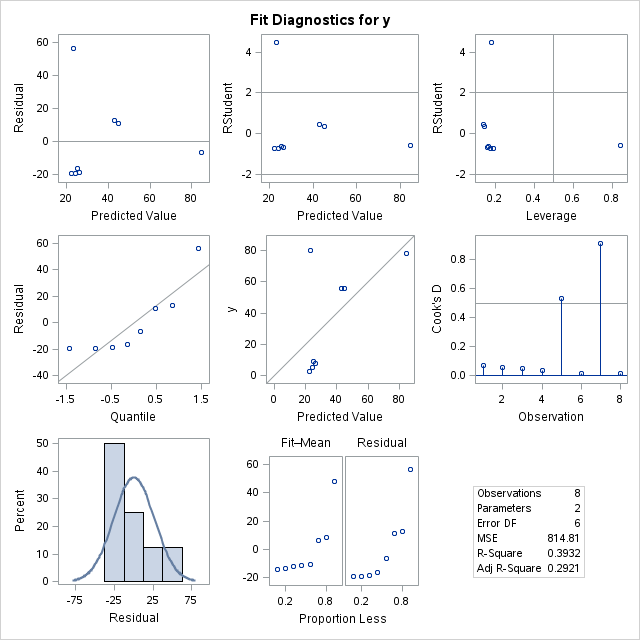
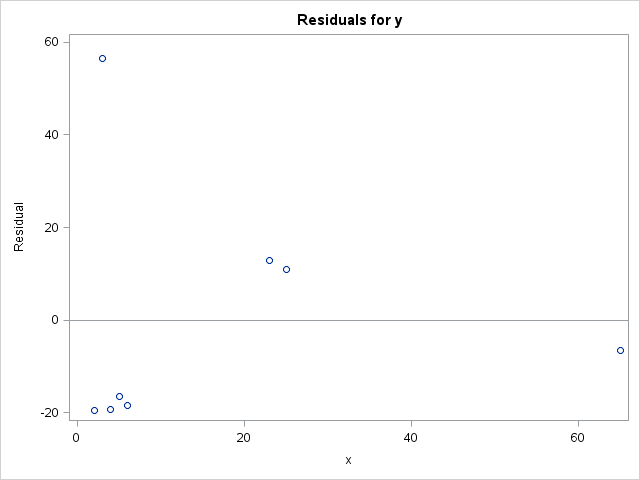
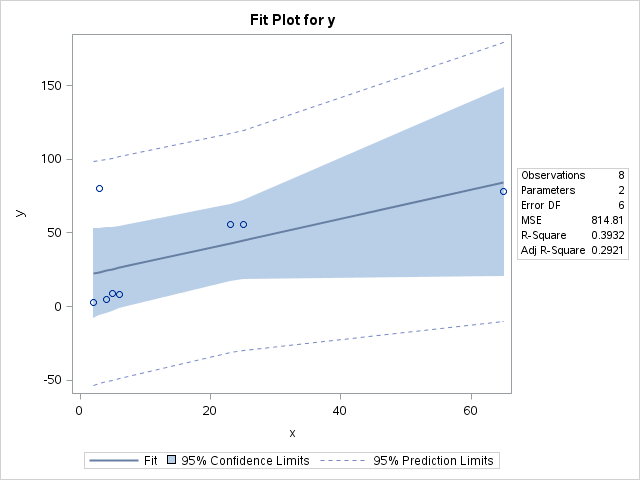

In [77]:
*test the result with proc reg;

proc reg data=test;
model y = x;
run;

## How to integrated a function in SAS

In [80]:
proc iml;

    start integrand(x);
        return x##2 + 2;
    finish integrand;

    call quad(answer,"Integrand", {0,1});
    print answer;
quit;

answer
2.3333333
